In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
# Load the dataset
traffic = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')


## Data Preprocessing

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic['holiday'].shape

(48204,)

In [4]:
traffic.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [5]:
traffic.shape

(48204, 9)

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Exploratory Data Analysis

In [7]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [8]:
traffic.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


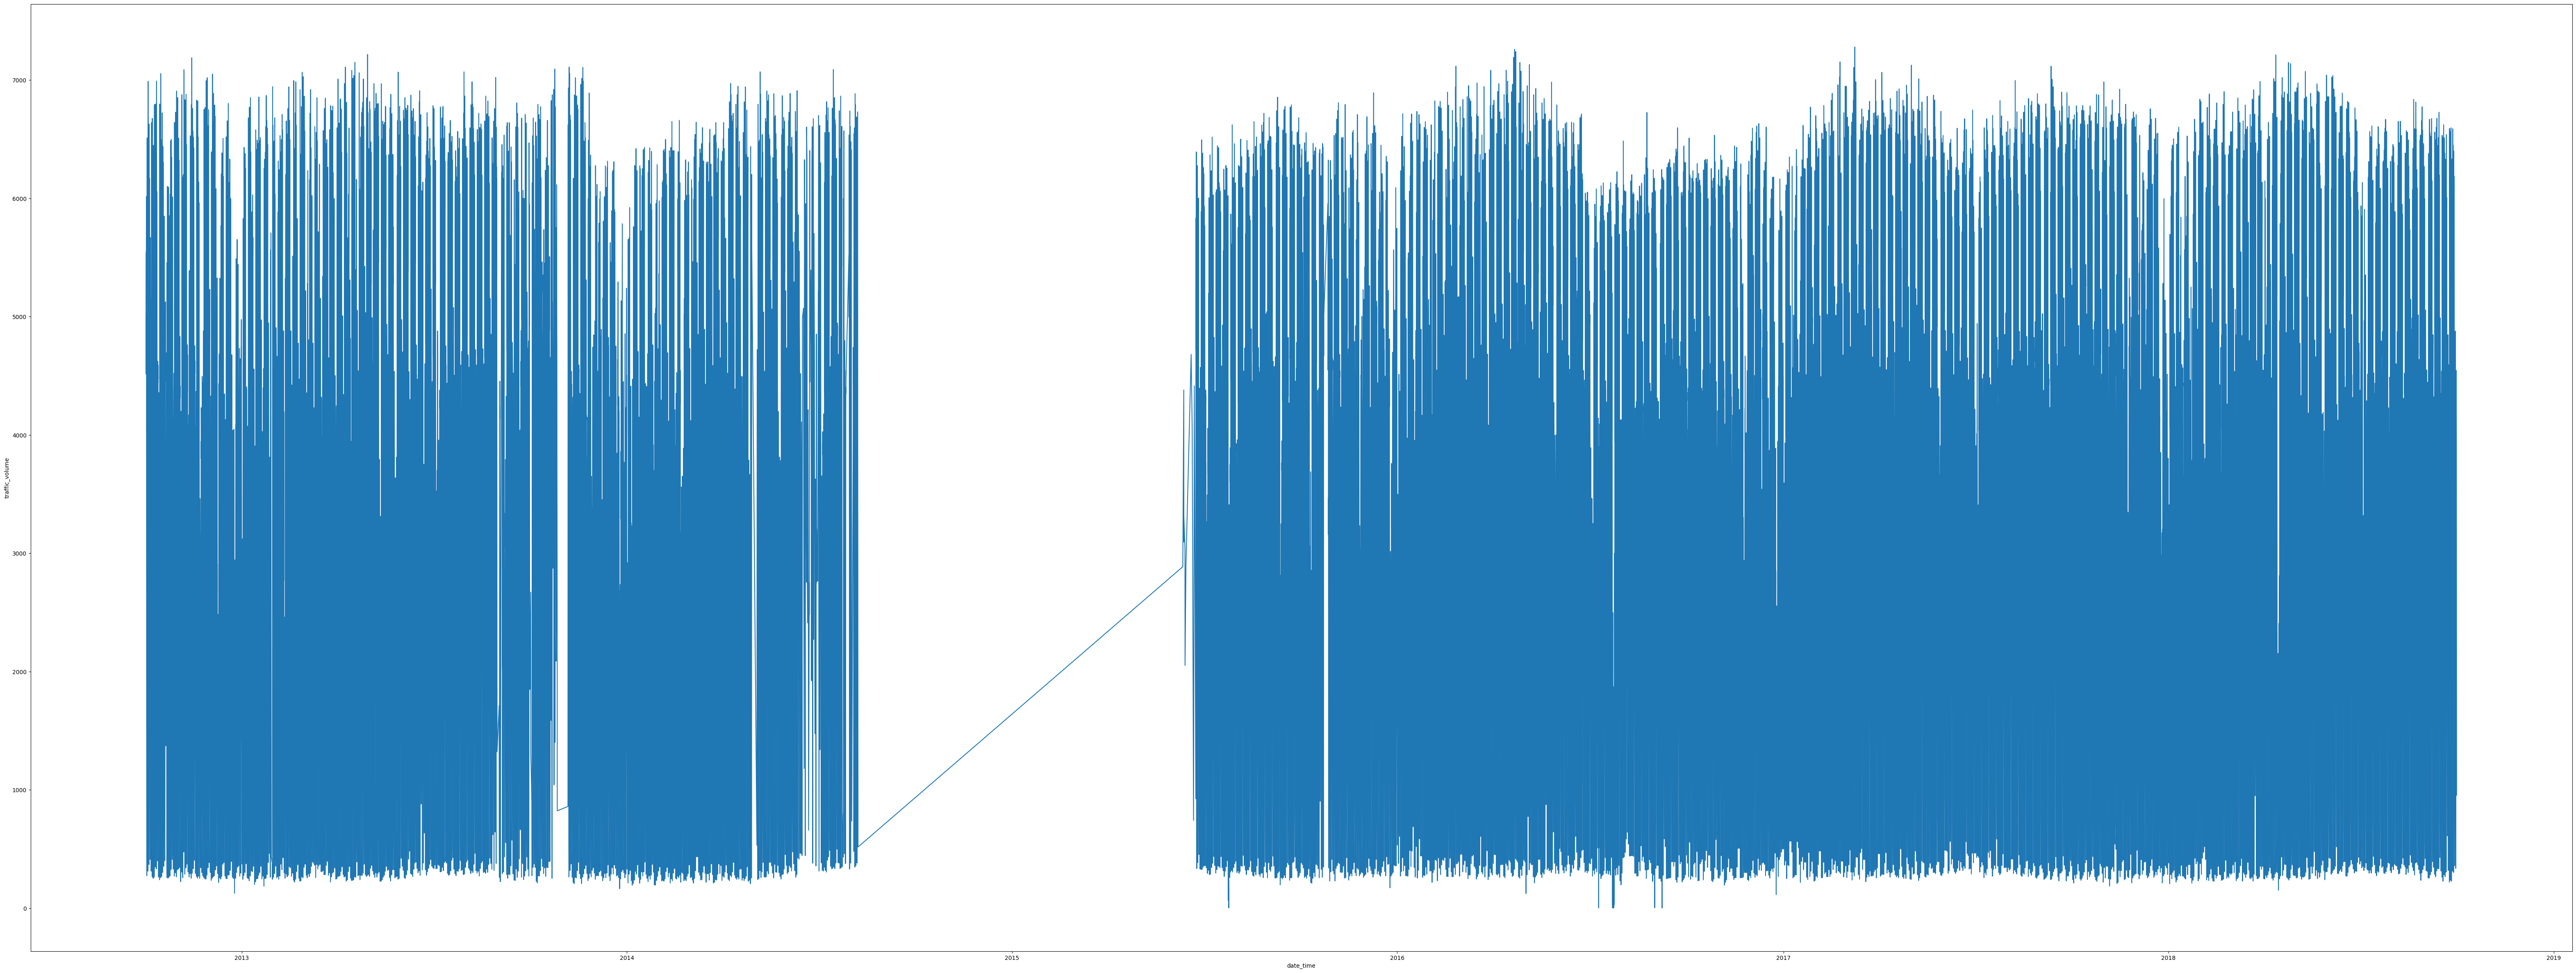

In [9]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
df_date_traffic = traffic.groupby('date_time').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(80,30))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

### As there is a gap in the data during 2015, we decided to take just the data from 2016 to 2018

# Converted data from (2016 -2018)

In [10]:
traffic_feat = traffic.copy()
day = traffic_feat[(traffic_feat['date_time'] >= '2016-01-01') & (traffic_feat['date_time']<= '2018-09-29')]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20344,New Years Day,265.94,0.00,0.0,90,Haze,haze,2016-01-01 00:00:00,1513
20345,New Years Day,265.94,0.00,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513
20346,NaN,266.00,0.00,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550
20347,NaN,266.01,0.00,0.0,90,Snow,light snow,2016-01-01 03:00:00,719
20348,NaN,264.80,0.00,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533
...,...,...,...,...,...,...,...,...,...
48149,NaN,281.23,0.00,0.0,40,Clouds,scattered clouds,2018-09-28 20:00:00,3538
48150,NaN,279.32,0.00,0.0,40,Clouds,scattered clouds,2018-09-28 21:00:00,3058
48151,NaN,278.09,0.00,0.0,20,Clouds,few clouds,2018-09-28 22:00:00,2713
48152,NaN,277.45,0.00,0.0,1,Clear,sky is clear,2018-09-28 23:00:00,3544


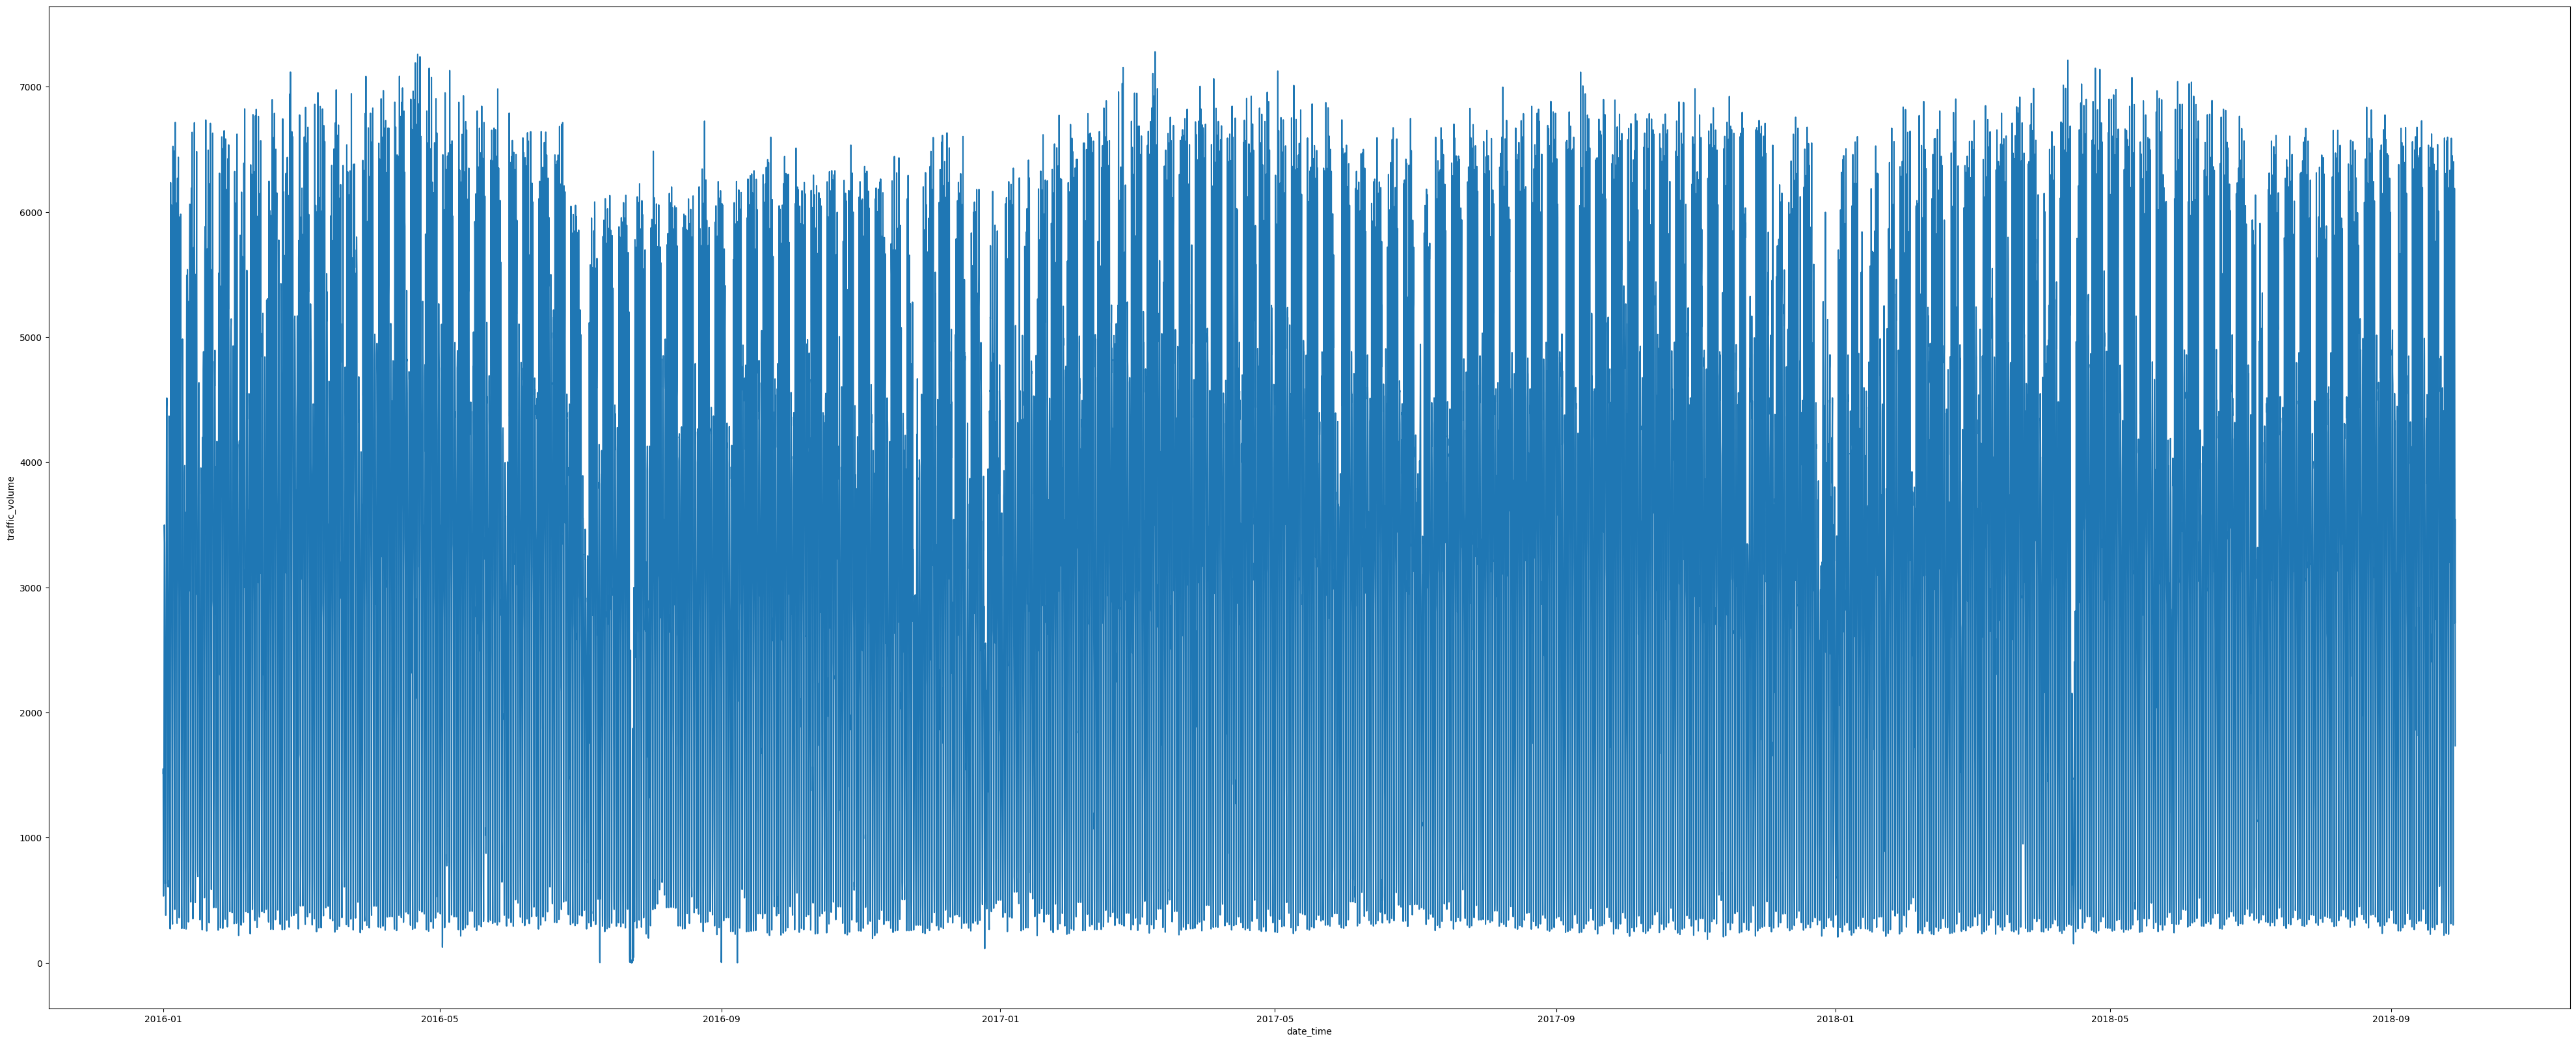

In [11]:
date_traffic_refine = day.groupby('date_time').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(50,20))
sns.lineplot(x = date_traffic_refine.index, y = date_traffic_refine.traffic_volume, data = date_traffic_refine)
plt.show()

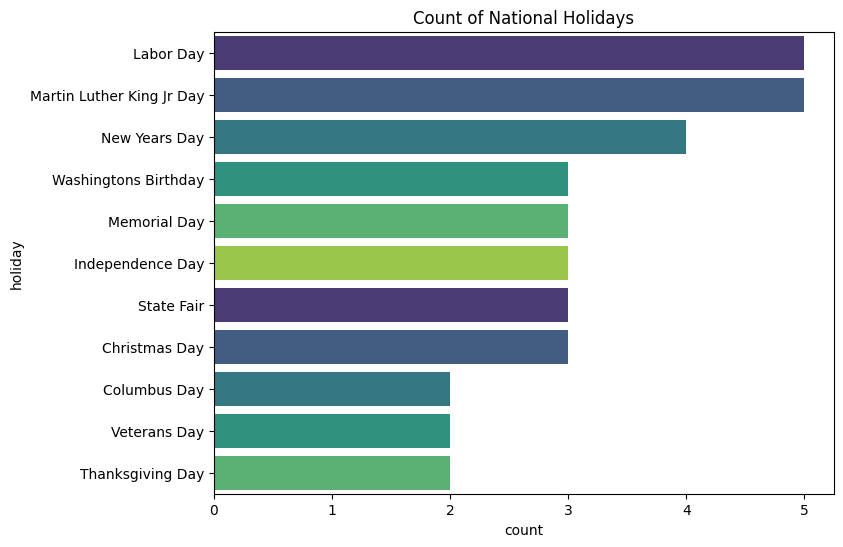

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'holiday' is not 'None'
holidays = day.loc[day['holiday'] != 'None']

# Get the count of each unique value in 'holiday' column and sort in descending order
holiday_counts = holidays['holiday'].value_counts().sort_values(ascending=False)

# Define a color palette
palette = sns.color_palette("viridis")

#Plot Number of National Holiday
plt.figure(figsize=(8, 6))
plt.title('Count of National Holidays')
sns.countplot(y='holiday', data=holidays, order=holiday_counts.index, palette=palette)
plt.show()

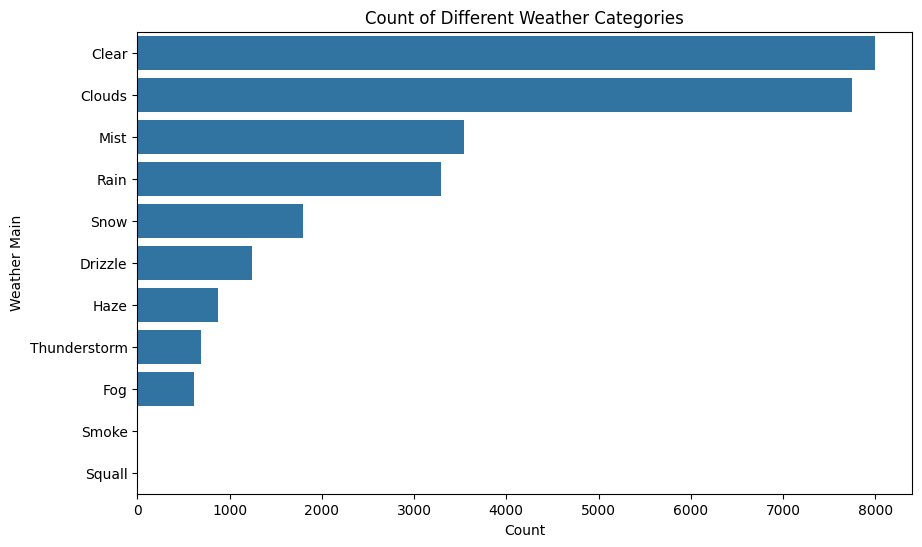

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of each unique value in 'weather_main' column
weather_counts = day['weather_main'].value_counts()

# Sorting counts from hightest to lowest
weather_counts_sorted = weather_counts.sort_values(ascending=False)

# Plot the count of weather categories
plt.figure(figsize=(10, 6))
sns.countplot(y='weather_main', data=day, order=weather_counts_sorted.index)
plt.title('Count of Different Weather Categories')
plt.xlabel('Count')
plt.ylabel('Weather Main')
plt.show()

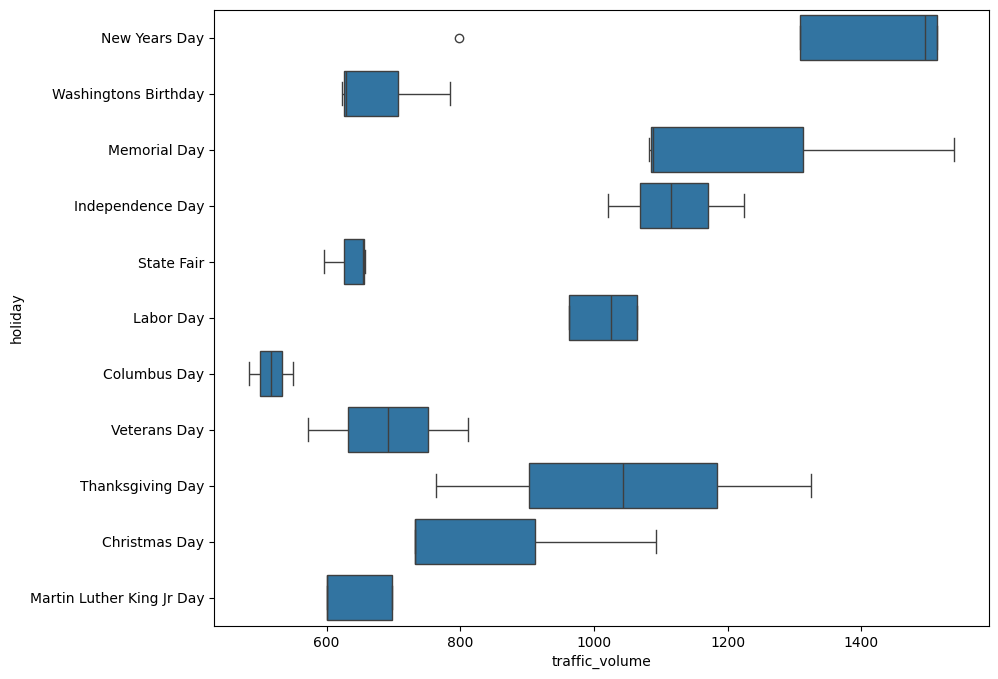

In [14]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

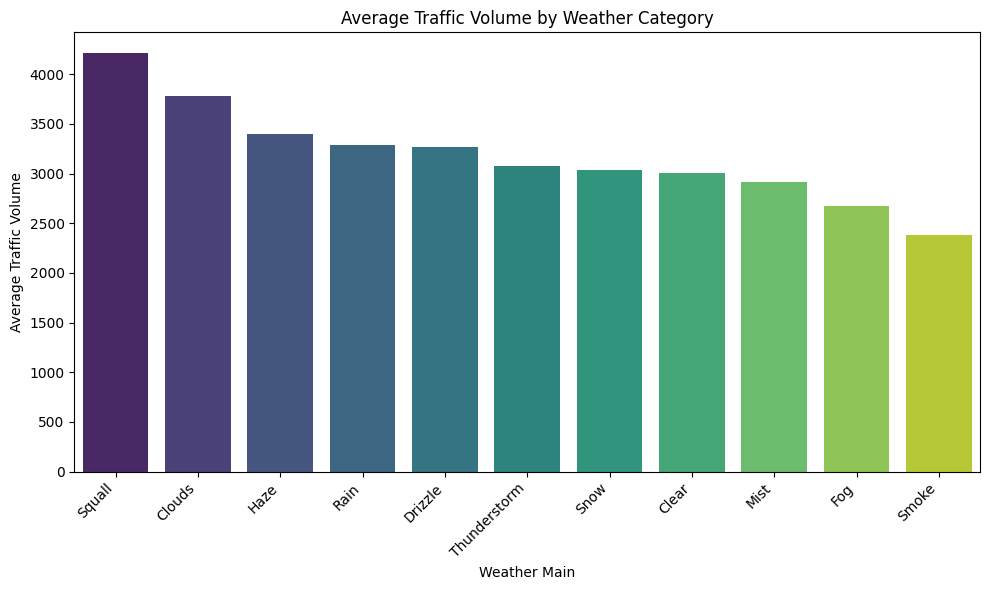

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean traffic volume for each weather category
mean_traffic_volume = day.groupby('weather_main')['traffic_volume'].mean()

# Sort the mean traffic volume in descending orderaib
mean_traffic_volume_sorted = mean_traffic_volume.sort_values(ascending=False)

# Create a gradient color palette
palette = sns.color_palette("viridis", len(mean_traffic_volume_sorted))

# Plot weather main against Traffic volume
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_traffic_volume_sorted.index, y=mean_traffic_volume_sorted.values, palette=palette)
plt.title('Average Traffic Volume by Weather Category')
plt.xlabel('Weather Main')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

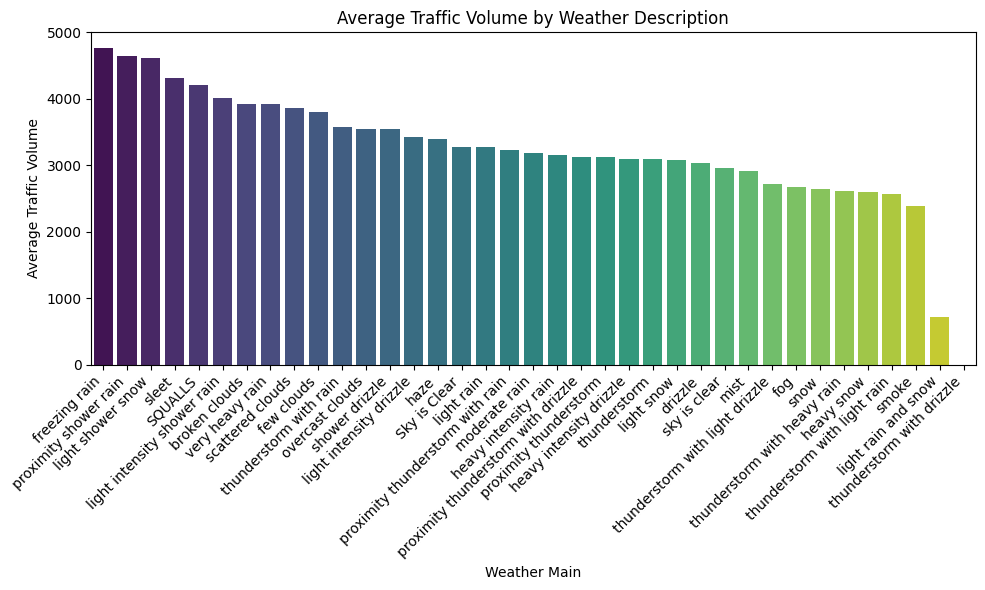

In [16]:
# Calculate the mean traffic volume for each weather category
mean_traffic_volume = day.groupby('weather_description')['traffic_volume'].mean()

# Sort the mean traffic volume in descending orderaib
mean_traffic_volume_sorted = mean_traffic_volume.sort_values(ascending=False)

# Create a gradient color palette
palette = sns.color_palette("viridis", len(mean_traffic_volume_sorted))

# Plot weather main against Traffic volume
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_traffic_volume_sorted.index, y=mean_traffic_volume_sorted.values, palette=palette)
plt.title('Average Traffic Volume by Weather Description')
plt.xlabel('Weather Main')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
#traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day['weekday'] = day['date_time'].dt.day_name()
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday
20344,New Years Day,265.94,0.00,0.0,90,Haze,haze,2016-01-01 00:00:00,1513,Friday
20345,New Years Day,265.94,0.00,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513,Friday
20346,NaN,266.00,0.00,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550,Friday
20347,NaN,266.01,0.00,0.0,90,Snow,light snow,2016-01-01 03:00:00,719,Friday
20348,NaN,264.80,0.00,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533,Friday
...,...,...,...,...,...,...,...,...,...,...
48149,NaN,281.23,0.00,0.0,40,Clouds,scattered clouds,2018-09-28 20:00:00,3538,Friday
48150,NaN,279.32,0.00,0.0,40,Clouds,scattered clouds,2018-09-28 21:00:00,3058,Friday
48151,NaN,278.09,0.00,0.0,20,Clouds,few clouds,2018-09-28 22:00:00,2713,Friday
48152,NaN,277.45,0.00,0.0,1,Clear,sky is clear,2018-09-28 23:00:00,3544,Friday


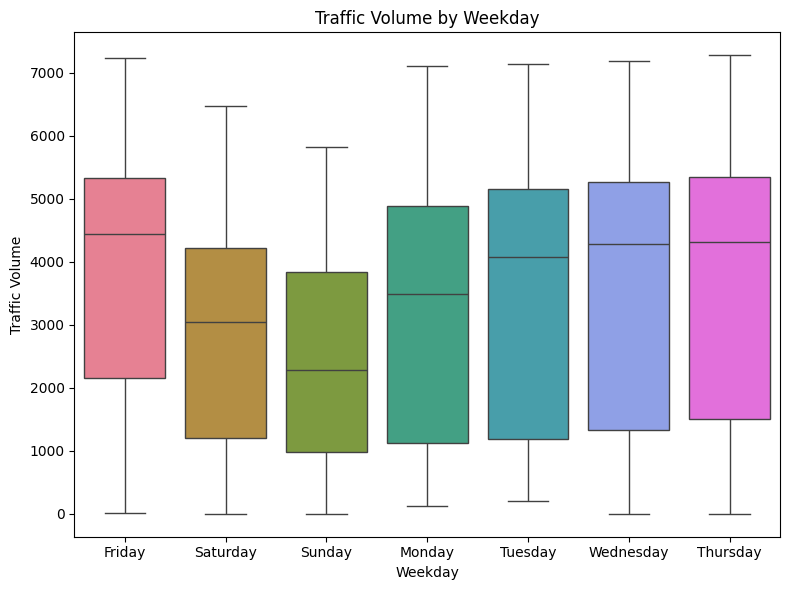

In [18]:
# Define a custom color palette
custom_palette = sns.color_palette("husl", len(day['weekday'].unique()))

# Plot the boxplot with the custom color palette and existing weekday column
plt.figure(figsize=(8, 6))
sns.boxplot(x='weekday', y='traffic_volume', data=day, palette=custom_palette)
plt.title('Traffic Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Traffic Volume')

plt.tight_layout()
plt.show()

### As there is a gap in the data during 2015, we decided to take just the data from 2016 to 2018

# Converted data from (2016 -2018)

In [19]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean("traffic_volume")
by_month['traffic_volume']

month
1     3060.159172
2     3253.335052
3     3355.988462
4     3303.163258
5     3334.410964
6     3474.860197
7     3092.450237
8     3365.328697
9     3301.273939
10    3319.044713
11    3127.452551
12    3075.542952
Name: traffic_volume, dtype: float64

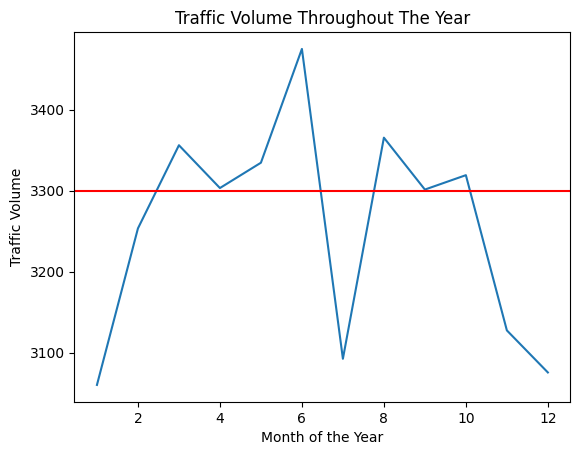

In [20]:
by_month['traffic_volume'].plot.line()
plt.xlabel('Month of the Year')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Throughout The Year')
plt.axhline(y=3300, color='Red')

plt.show()

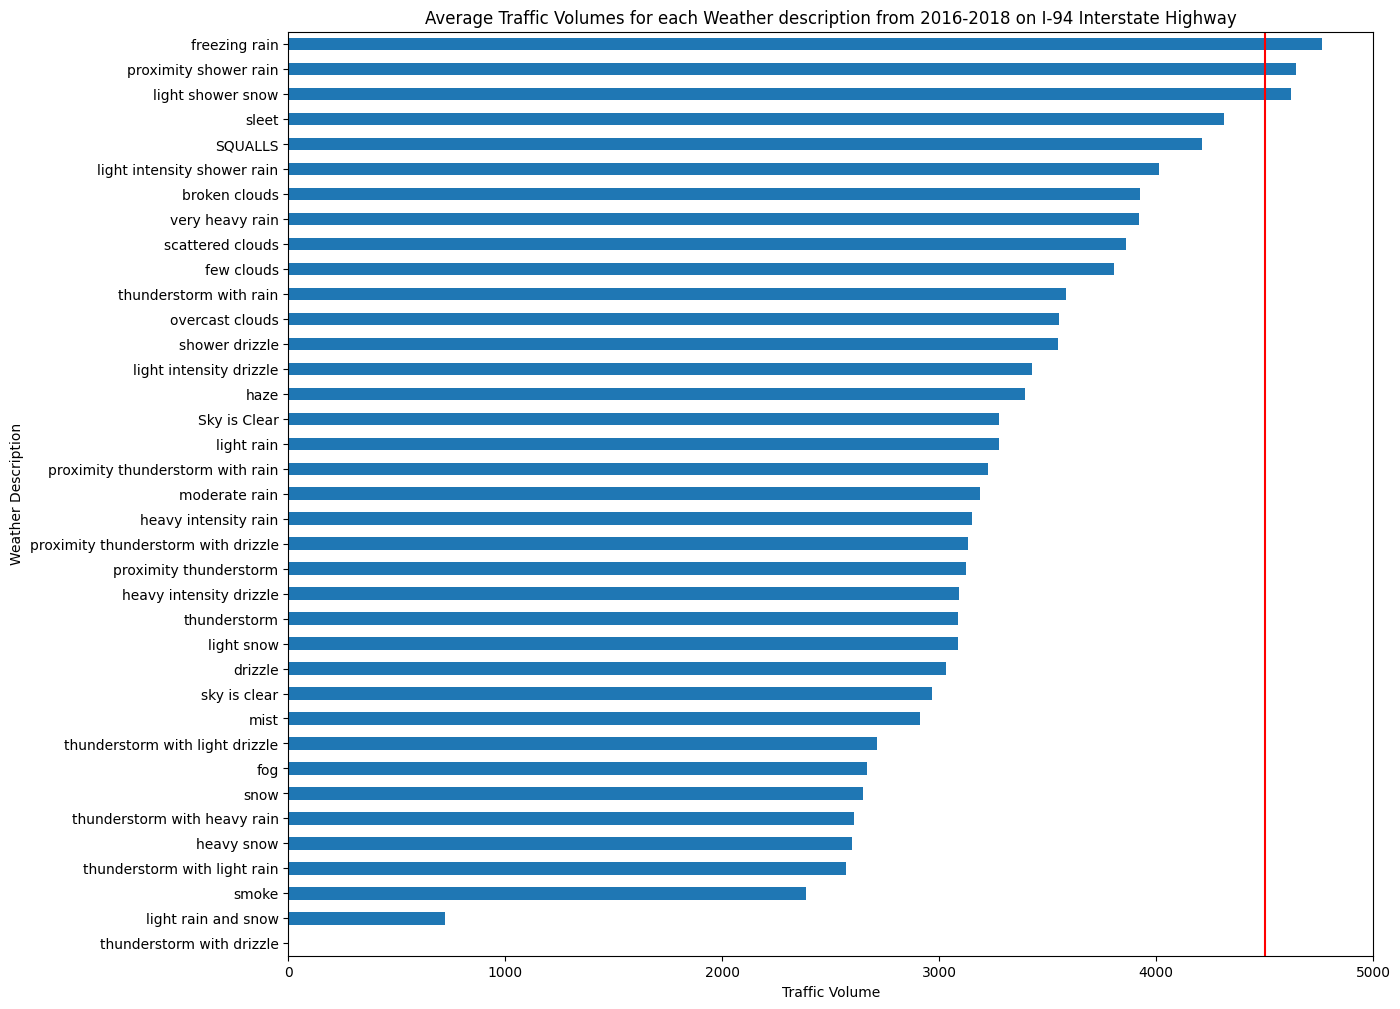

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

# Sorting the DataFrame by 'traffic_volume' column in descending order
by_weather_description = day.groupby('weather_description').mean("traffic_volume")
by_weather_description_sorted = by_weather_description.sort_values('traffic_volume', ascending=True)

by_weather_description_sorted['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Average Traffic Volumes for each Weather description from 2016-2018 on I-94 Interstate Highway')
plt.axvline(x=4500, color='Red')

plt.show()

In [22]:
day_split = day[(day['date_time'].dt.hour >= 7) & (day['date_time'].dt.hour < 19)]
day_split['month'] = day_split['date_time'].dt.month
by_month = day_split.groupby('month').mean("traffic_volume")
by_month['traffic_volume']

month
1     4498.489600
2     4790.436433
3     4974.237843
4     4885.856809
5     4896.182642
6     4894.726619
7     4417.936444
8     4866.238025
9     4848.043621
10    4815.182927
11    4647.238522
12    4388.905520
Name: traffic_volume, dtype: float64

In [23]:
by_weather_description = day_split.groupby('weather_description').mean("traffic_volume")

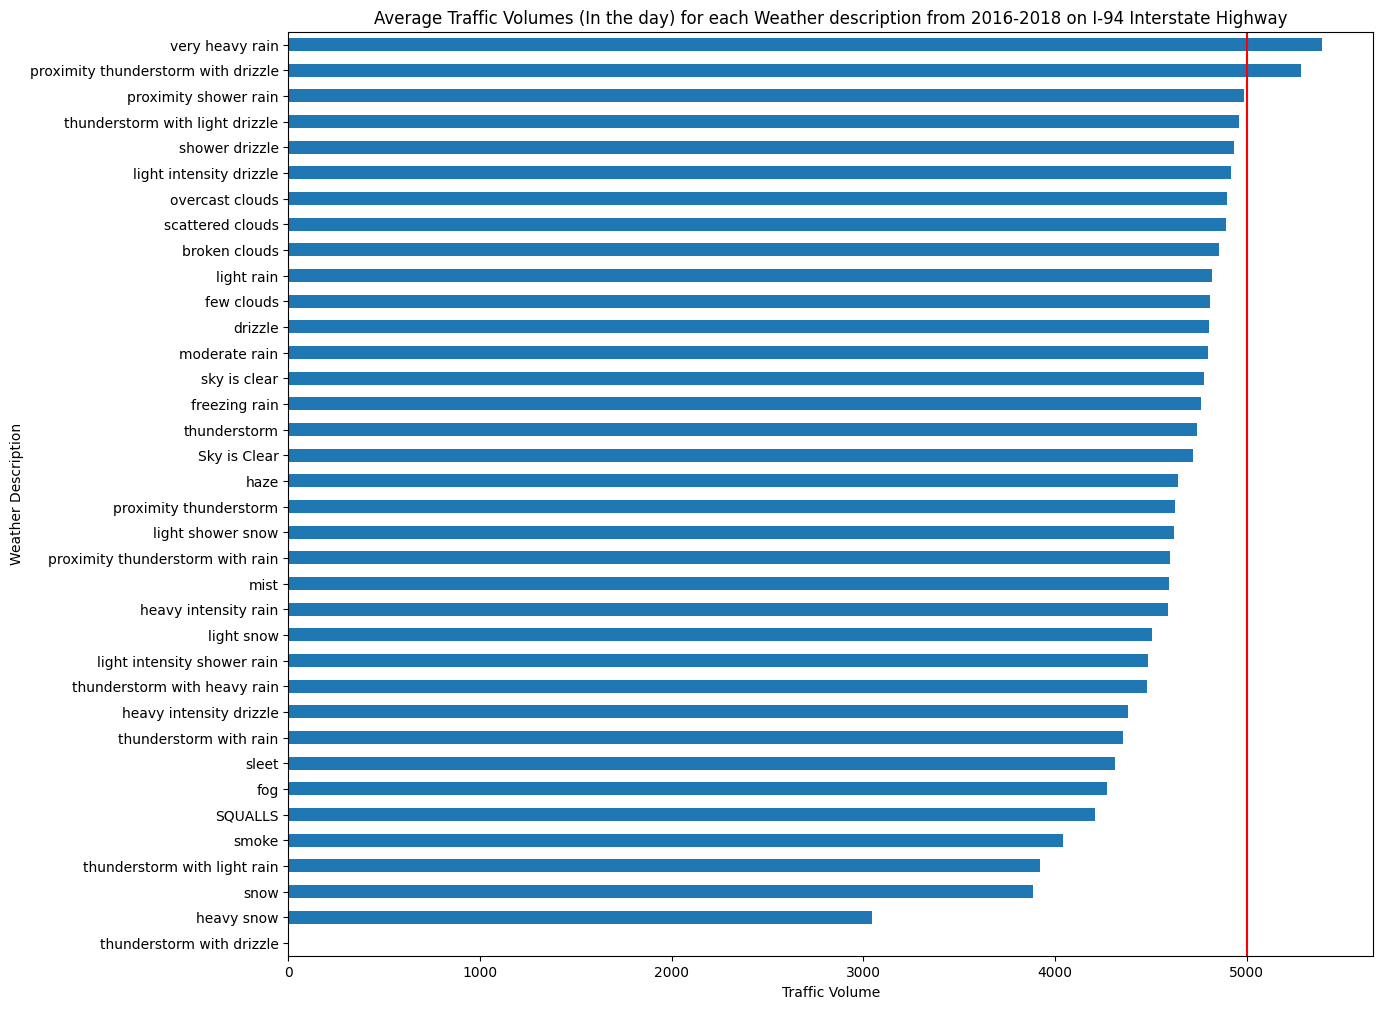

In [24]:
plt.figure(figsize=(14, 12))

# Sorting the DataFrame by 'traffic_volume' column in descending order
by_weather_description_sorted = by_weather_description.sort_values('traffic_volume', ascending=True)

by_weather_description_sorted['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Average Traffic Volumes (In the day) for each Weather description from 2016-2018 on I-94 Interstate Highway')
plt.axvline(x=5000, color='Red')

plt.show()

In [25]:
night_split = day[(day['date_time'].dt.hour >= 19) | (day['date_time'].dt.hour < 7)]
night_split['month'] = night_split['date_time'].dt.month
by_month = night_split.groupby('month').mean("traffic_volume")
by_month['traffic_volume']

month
1     1636.633413
2     1753.237963
3     1842.142266
4     1802.232472
5     1848.877961
6     1970.835732
7     1814.266098
8     1884.067636
9     1809.746032
10    1849.783234
11    1668.131183
12    1659.996568
Name: traffic_volume, dtype: float64

In [26]:
by_weather_description = night_split.groupby('weather_description').mean("traffic_volume")

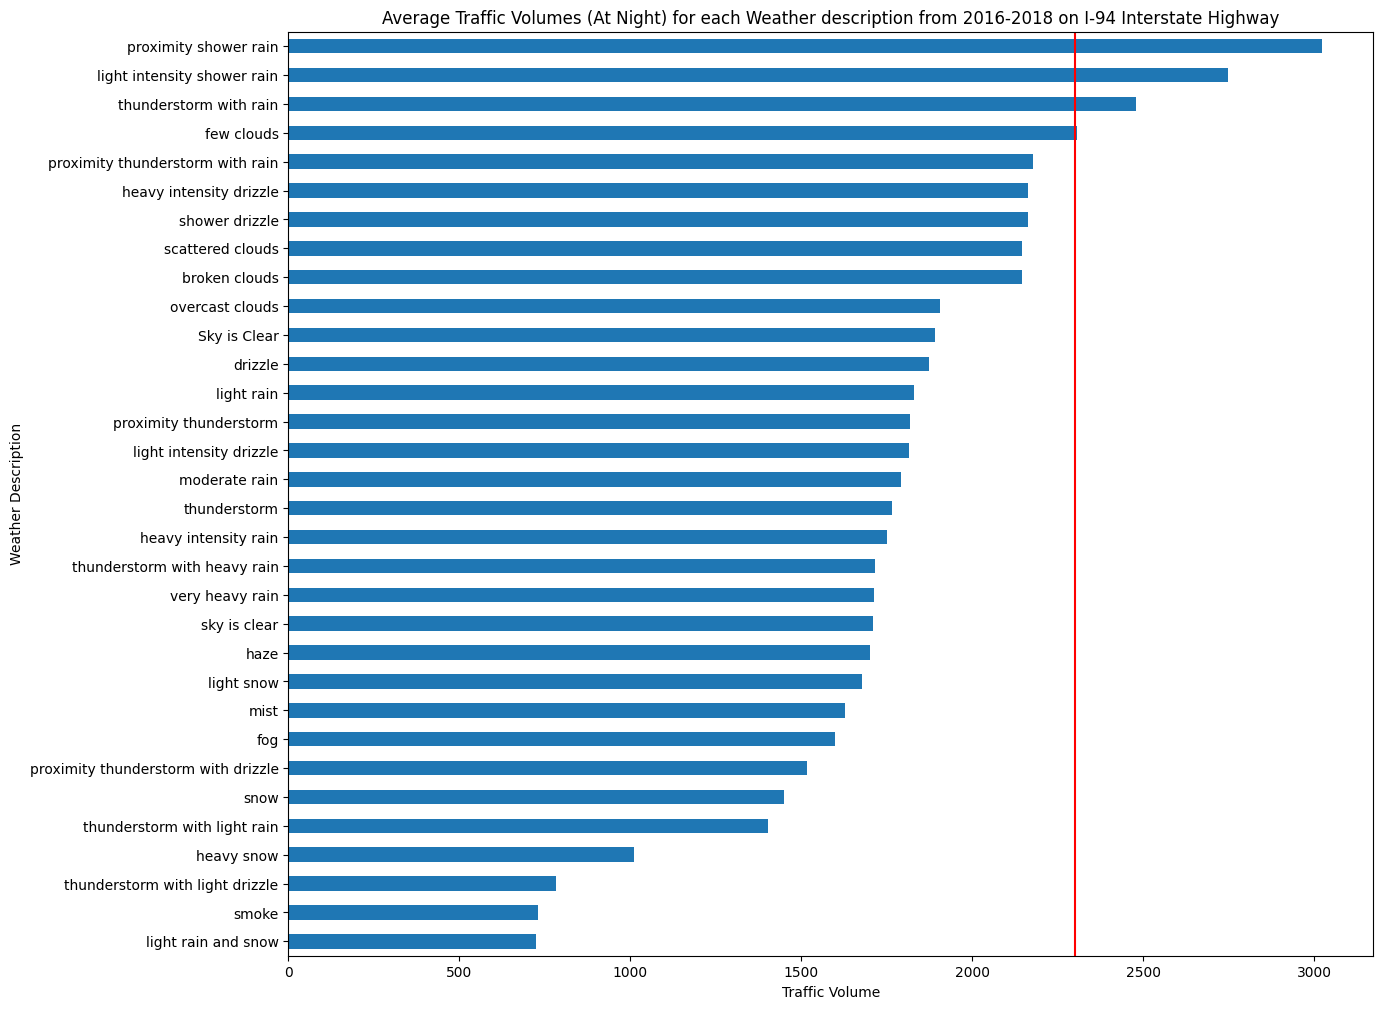

In [27]:
plt.figure(figsize=(14, 12))

# Sorting the DataFrame by 'traffic_volume' column in descending order
by_weather_description_sorted = by_weather_description.sort_values('traffic_volume', ascending=True)

by_weather_description_sorted['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Average Traffic Volumes (At Night) for each Weather description from 2016-2018 on I-94 Interstate Highway')
plt.axvline(x=2300, color='Red')

plt.show()

## ACF & PACF Plots

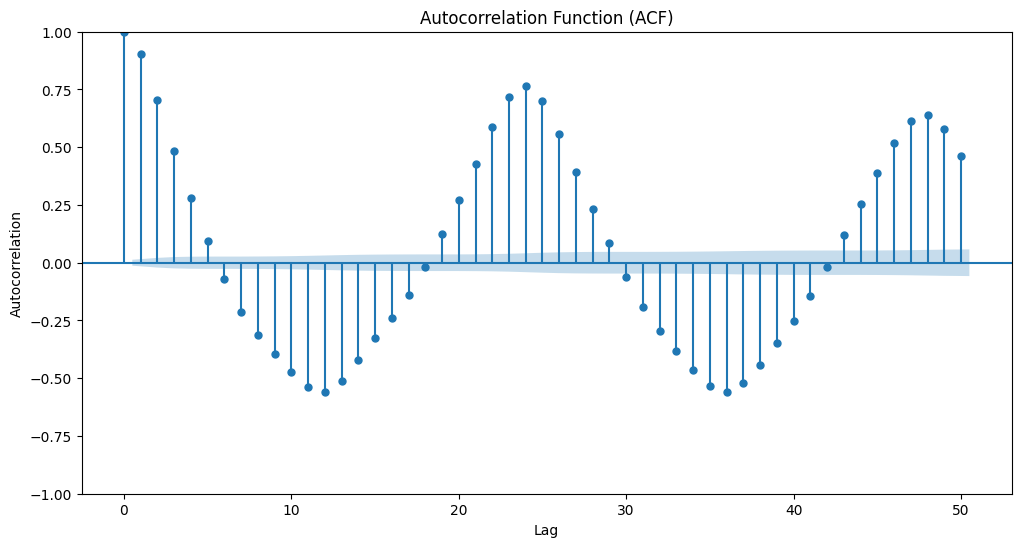

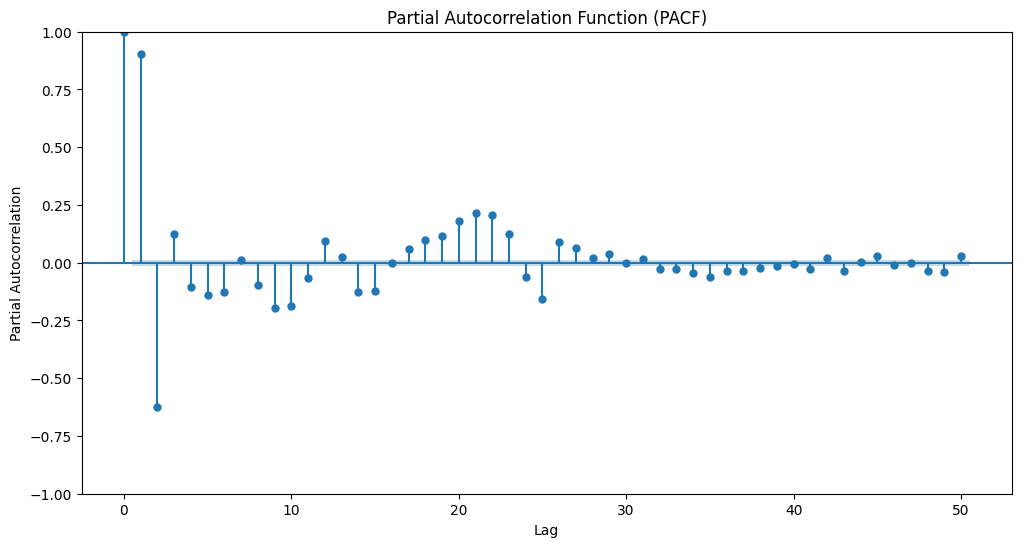

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF (Autocorrelation Function) with noise lines
plt.figure(figsize=(12, 6))
plot_acf(date_traffic_refine['traffic_volume'], lags=50, ax=plt.gca(), alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the PACF (Partial Autocorrelation Function) with noise lines
plt.figure(figsize=(12, 6))
plot_pacf(date_traffic_refine['traffic_volume'], lags=50, ax=plt.gca(), alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [29]:
pred_model = day.copy()
pred_model['month'] = pred_model['date_time'].dt.month
pred_model['hour'] = pred_model['date_time'].dt.hour

# Set 'date_time' as index
pred_model.set_index('date_time', inplace=True)
#day
pred_model

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,month,hour
date_time,,,,,,,,,,,
2016-01-01 00:00:00,New Years Day,265.94,0.00,0.0,90,Haze,haze,1513,Friday,1,0
2016-01-01 00:00:00,New Years Day,265.94,0.00,0.0,90,Snow,light snow,1513,Friday,1,0
2016-01-01 01:00:00,NaN,266.00,0.00,0.0,90,Snow,light snow,1550,Friday,1,1
2016-01-01 03:00:00,NaN,266.01,0.00,0.0,90,Snow,light snow,719,Friday,1,3
2016-01-01 04:00:00,NaN,264.80,0.00,0.0,90,Clouds,overcast clouds,533,Friday,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-28 20:00:00,NaN,281.23,0.00,0.0,40,Clouds,scattered clouds,3538,Friday,9,20
2018-09-28 21:00:00,NaN,279.32,0.00,0.0,40,Clouds,scattered clouds,3058,Friday,9,21
2018-09-28 22:00:00,NaN,278.09,0.00,0.0,20,Clouds,few clouds,2713,Friday,9,22


##ARIMA & SARIMAX Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                18429
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -150489.814
Date:                Thu, 18 Apr 2024   AIC                         300985.629
Time:                        15:25:57   BIC                         301009.094
Sample:                             0   HQIC                        300993.337
                              - 18429                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3283.8824     73.724     44.543      0.000    3139.386    3428.379
ar.L1          0.9012      0.004    220.555      0.000       0.893       0.909
sigma2       7.25e+05   6221.046    116.536      0.0

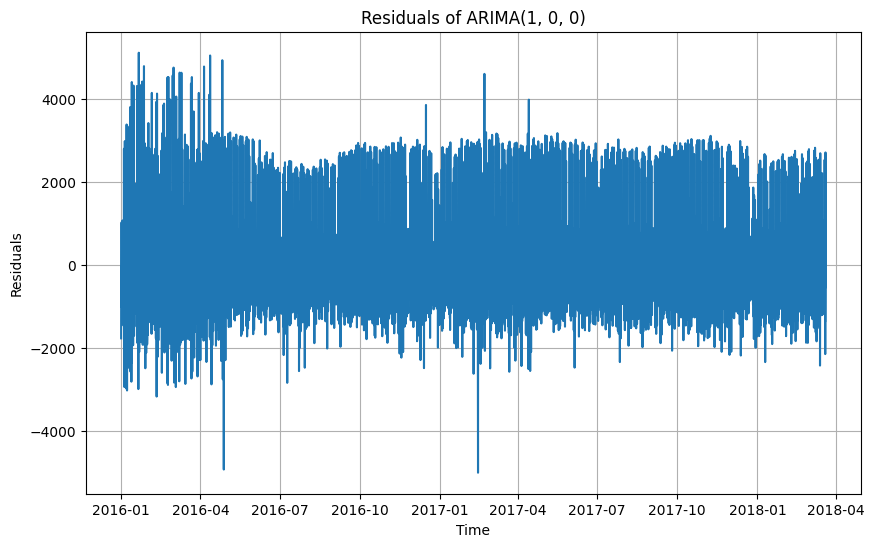

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

train_data, test_data = train_test_split(date_traffic_refine, test_size=0.2, shuffle=False)

# Fit ARIMA(1,0,0) model
arima_model = sm.tsa.ARIMA(train_data['traffic_volume'], order=(1, 0, 0)).fit()

# Print model summary
print(arima_model.summary())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(arima_model.resid)
plt.title('Residuals of ARIMA(1, 0, 0)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     traffic_volume   No. Observations:                18429
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -144687.908
Date:                            Thu, 18 Apr 2024   AIC                         289385.816
Time:                                    15:29:59   BIC                         289424.918
Sample:                                         0   HQIC                        289398.661
                                          - 18429                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1109      0.012      9.383      0.000       0.088       0.134
ma.L1          0.3434      0.012   

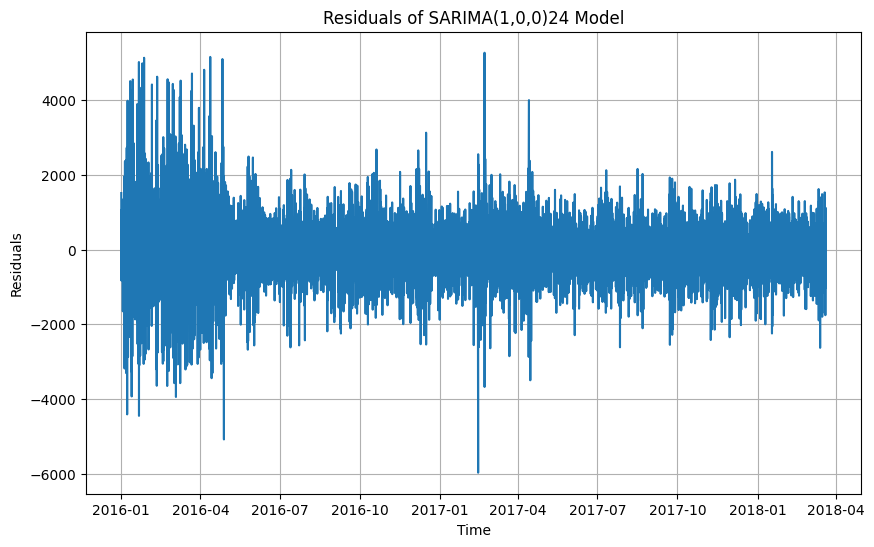

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Splitting data into training and testing sets
#train_data, test_data = train_test_split(date_traffic_refine, test_size=0.2, shuffle=False)

# Fit SARIMA(1,0,0)24 model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)  # Assuming yearly seasonality
sarima_model = SARIMAX(train_data['traffic_volume'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Summary of the model
print(sarima_result.summary())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(sarima_result.resid)
plt.title('Residuals of SARIMA(1,0,0)24 Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [32]:
import numpy as np

# Forecasting
forecast = sarima_result.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean
test_data.index = forecast_mean.index
# Calculating errors
mse = ((forecast_mean - test_data.squeeze()) ** 2).mean()
mae = np.abs(forecast_mean - test_data.squeeze()).mean()
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error (MSE): 28585475.44860232
Mean Absolute Error (MAE): 4394.8452318196905
Root Mean Squared Error (RMSE): 5346.538641831958


In [33]:
# Fit ARIMA(1,0,0) model
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_data, order=(1, 0, 0))
arima_result = arima_model.fit()

# Forecasting
forecast = arima_result.forecast(steps=len(test_data))

# Calculating errors
mse = ((forecast - test_data.squeeze()) ** 2).mean()
mae = np.abs(forecast - test_data.squeeze()).mean()
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 3948656.134322841
Mean Absolute Error (MAE): 1740.2624188456607
Root Mean Squared Error (RMSE): 1987.1225765721754


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
